In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Using the code presented in Raschka Chapter 10:

Perform an exploratory data analysis, implement a Linear, Ridge, and Lasso regression model. (3 models total)

For this assignment you will submit one PDF document.

Refer to the Module 4 homework template document that has been provided.



In [2]:
data = pd.read_csv("housing.csv")
data.head()

ATT1      ATT2      ATT3      ATT4      ATT5      ATT6      ATT7  \
0  0.038327  0.592379  0.655174  0.119839  0.652477  0.984323  0.206738   
1  0.225022  0.983103  0.803619  0.836315  0.163104  0.637497  0.008760   
2  0.423233  0.375808  0.271293  0.729824  0.886744  0.043703  0.457700   
3  0.743370  0.929103  0.589894  0.644012  0.110490  0.774604  0.306483   
4  0.378623  0.786609  0.712752  0.110274  0.762133  0.030069  0.316631   

       ATT8      ATT9     ATT10  ...    NOX     RM   AGE     DIS  RAD  TAX  \
0  0.374650  0.463350  0.333610  ...  0.538  6.575  65.2  4.0900    1  296   
1  0.631190  0.207978  0.880357  ...  0.469  6.421  78.9  4.9671    2  242   
2  0.862450  0.901924  0.062488  ...  0.469  7.185  61.1  4.9671    2  242   
3  0.880599  0.630401  0.928894  ...  0.458  6.998  45.8  6.0622    3  222   
4  0.667073  0.426443  0.400557  ...  0.458  7.147  54.2  6.0622    3  222   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

[5 rows x 27 columns]

In [3]:
data.shape

(506, 27)

# EDA 

## Check Correlation

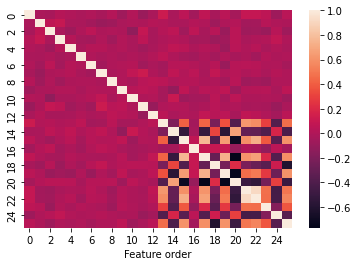

In [4]:
import numpy as np
cm = np.corrcoef(data.drop(columns=['MEDV']).values.T)
sns.heatmap(cm)
plt.xlabel("Feature order")
plt.show()

From the above heat map, we could tell first 13 features have weak correlation with all other features.

## Scatter Plot Matrix

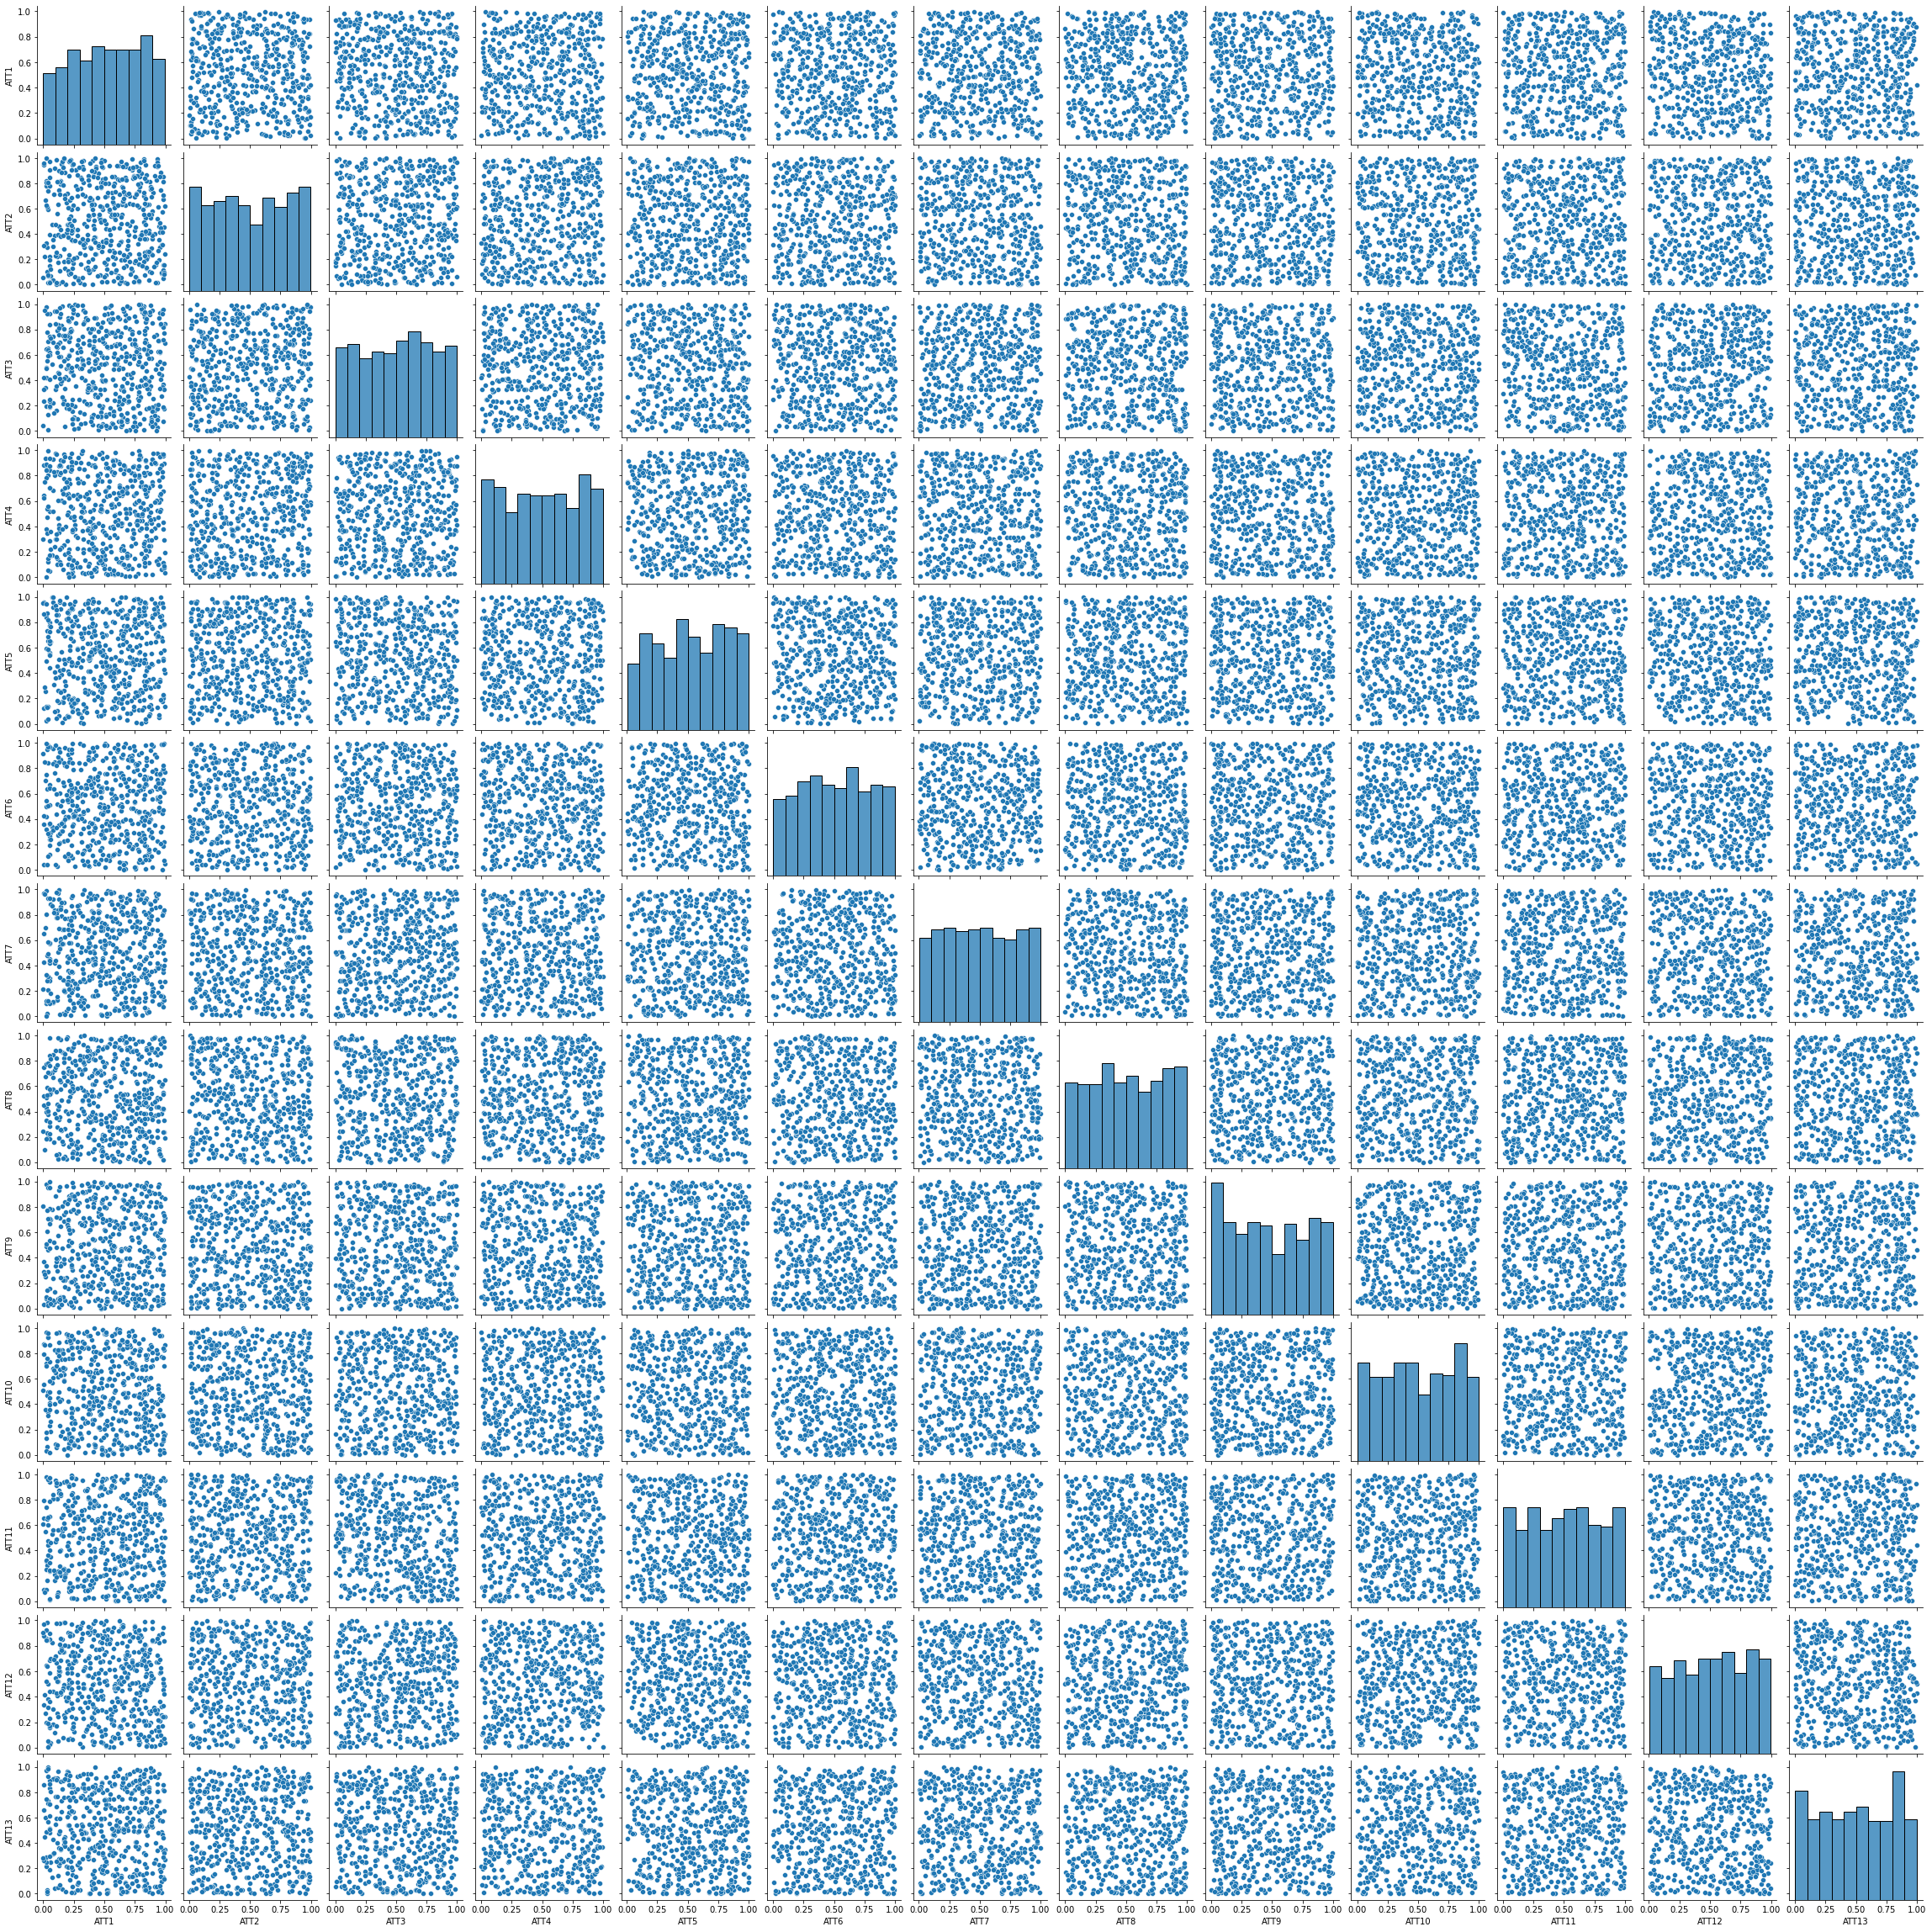

In [5]:
sns.pairplot(data.iloc[:, 0:13])
plt.show()

We could clearly tell that first 13 features are noises.

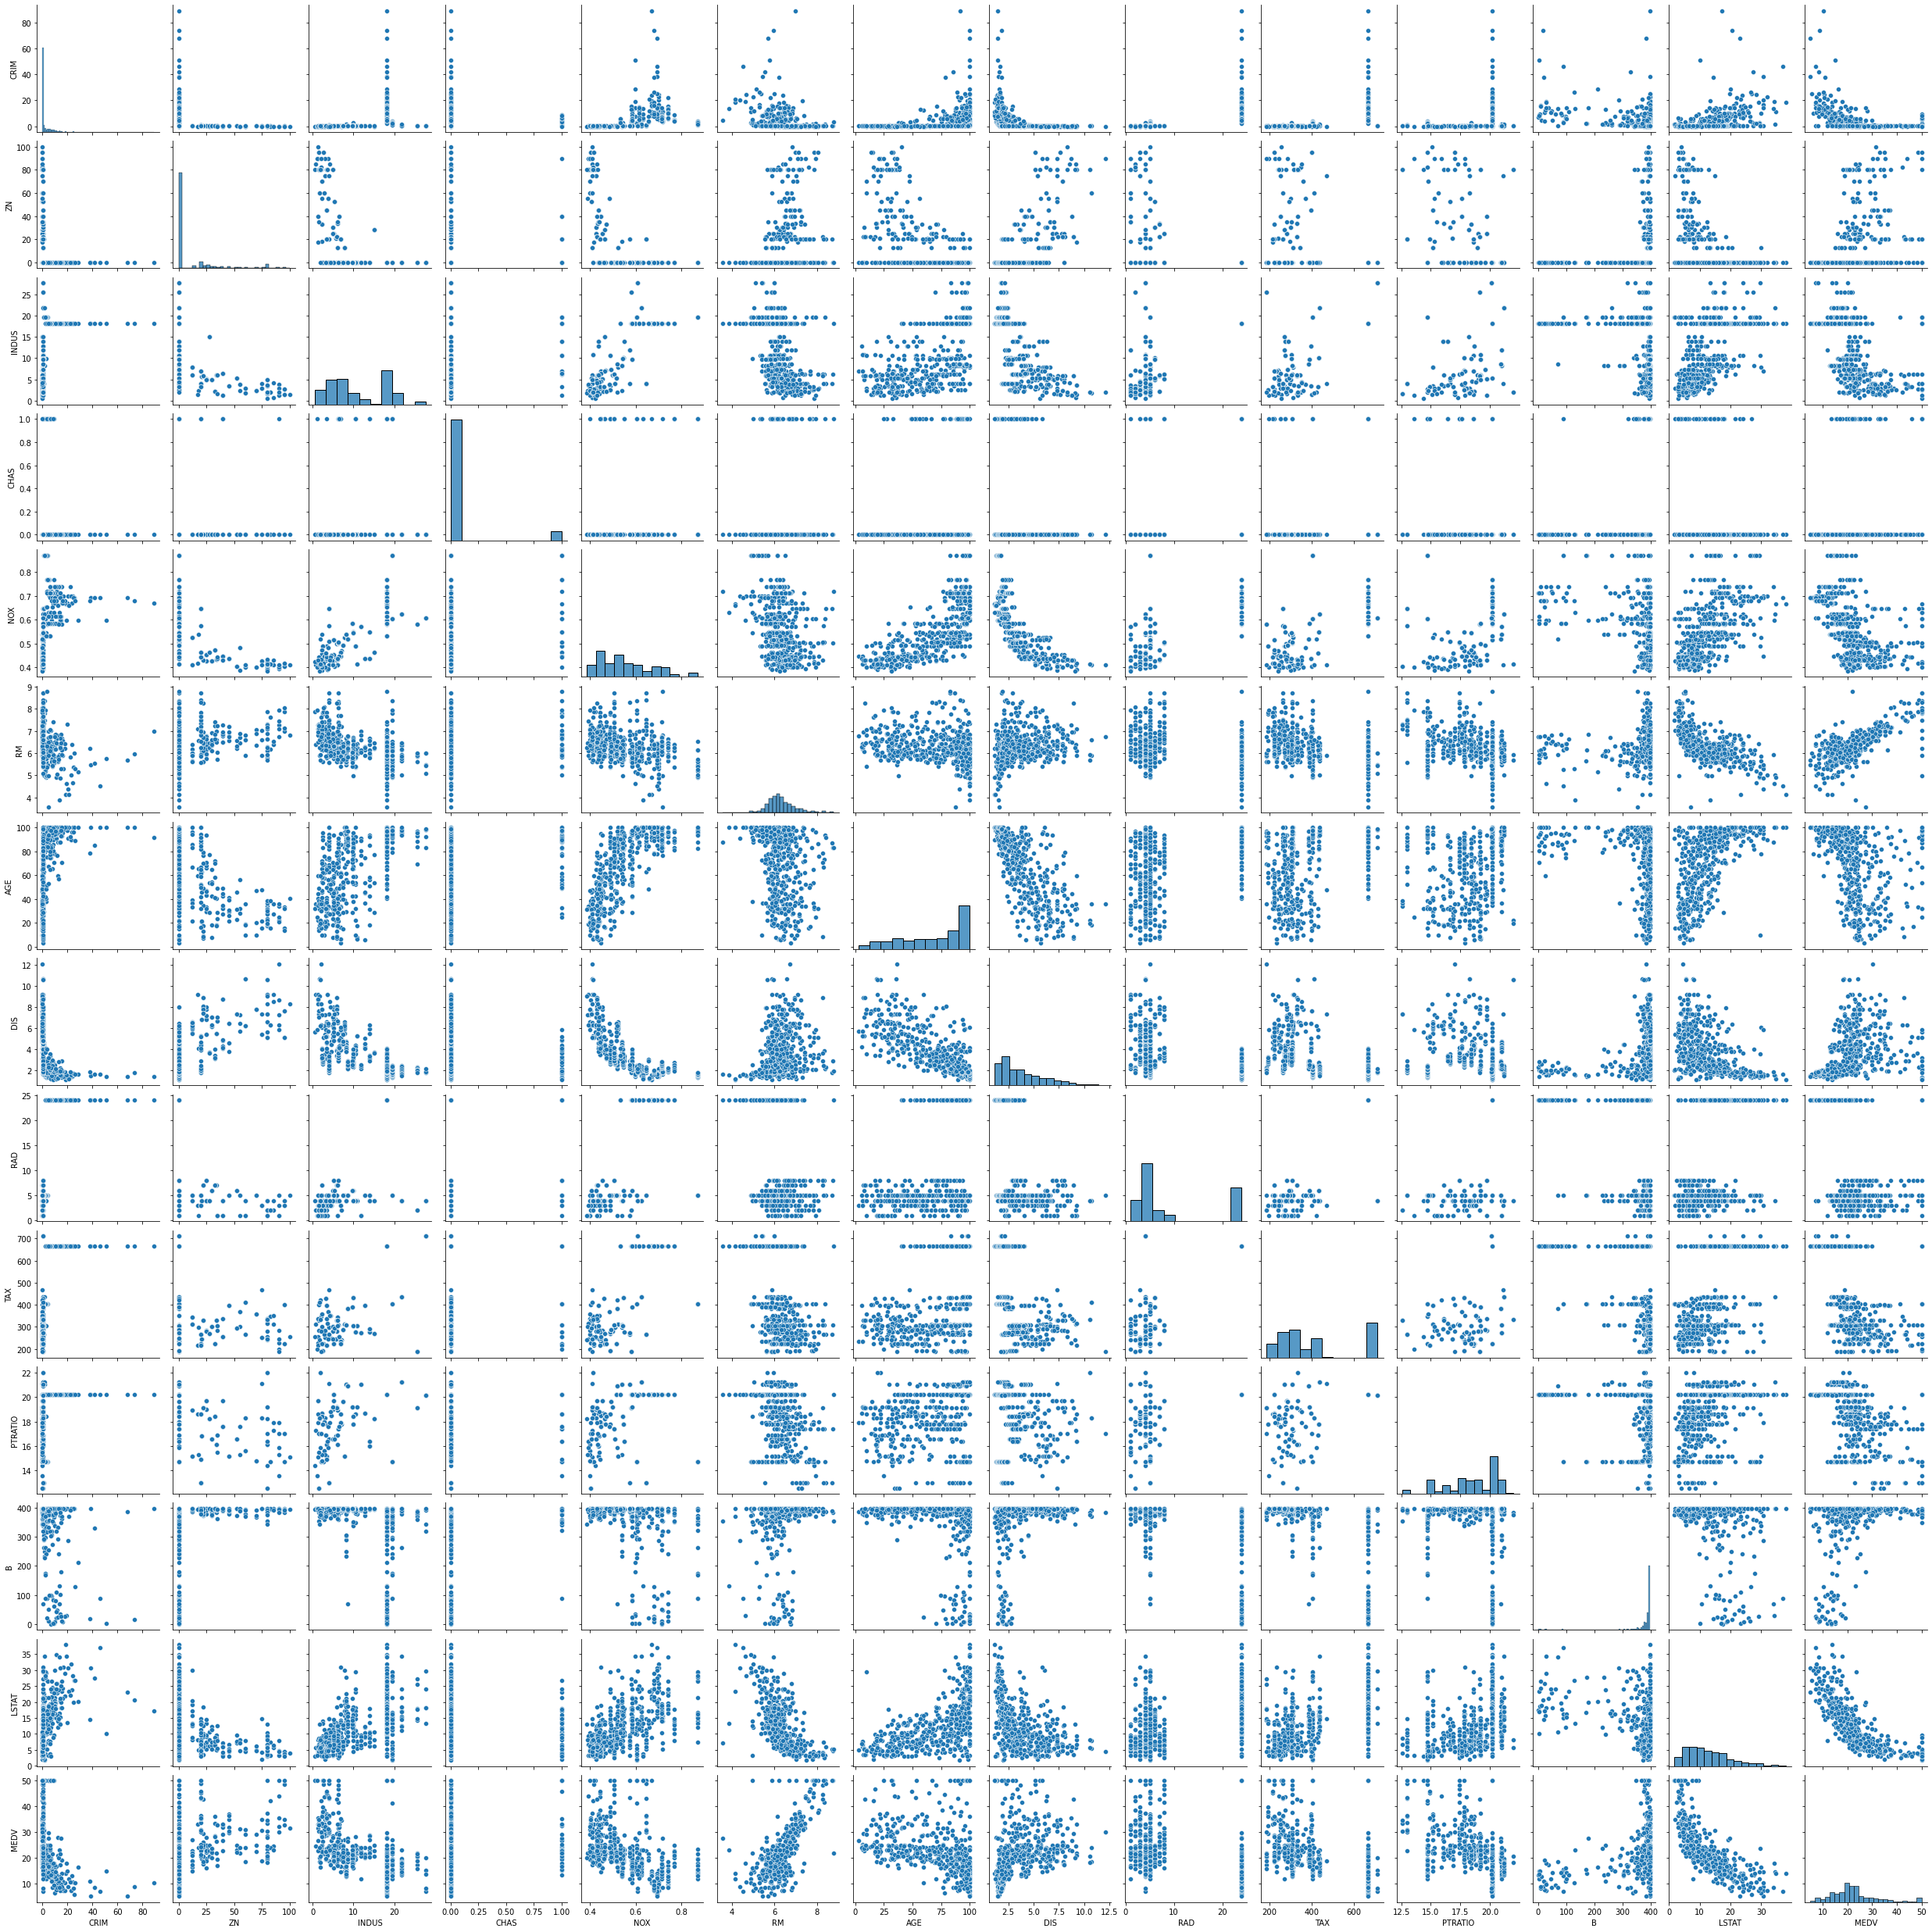

In [6]:
sns.pairplot(data.iloc[:, 13:])
plt.show()

The remaining features have patterns.

# Model Fitting

In [7]:
X = data.drop(columns=["MEDV"])
y = data['MEDV']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_train_pred = linear_reg.predict(X_train)
y_pred = linear_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
print("Training mse:", mean_squared_error(y_train_pred, y_train))
print("Testing mse:", mean_squared_error(y_pred, y_test))
from sklearn.metrics import r2_score
print("Training R2:", r2_score(y_train_pred, y_train))
print("Testing R2:", r2_score(y_pred, y_test))

Training mse: 20.612846807058926
Testing mse: 26.63023048426116
Training R2: 0.6889122619509193
Testing R2: 0.605005280107417


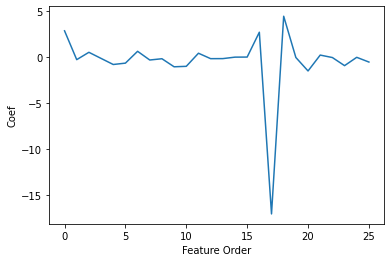

In [10]:
plt.plot(linear_reg.coef_)
plt.xlabel("Feature Order")
plt.ylabel("Coef")
plt.show()

In [11]:
print(linear_reg.intercept_)

29.011841172930875


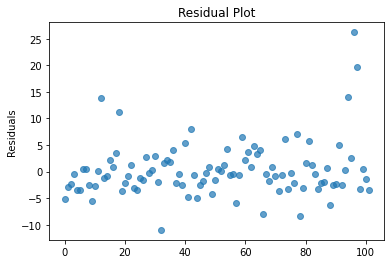

In [12]:
plt.scatter(range(len(y_test)) ,y_test - y_pred, alpha = 0.7)
plt.title("Residual Plot")
plt.ylabel("Residuals")
plt.show()

## Ridge Model

In [13]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [14]:
print("Training mse:", mean_squared_error(y_train_pred, y_train))
print("Testing mse:", mean_squared_error(y_pred, y_test))
print("Training R2:", r2_score(y_train_pred, y_train))
print("Testing R2:", r2_score(y_pred, y_test))

Training mse: 20.793083861425593
Testing mse: 26.826564073412623
Training R2: 0.6822938638993759
Testing R2: 0.6034716811788915


Testing mse is still much higher than the training mse. Regularization does not work.

In [15]:
ridge.intercept_

24.220248576790958

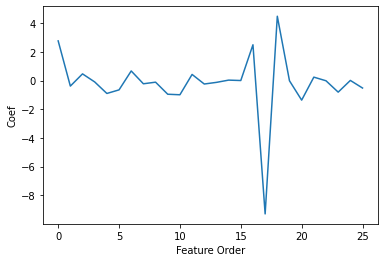

In [16]:
plt.plot(ridge.coef_)
plt.xlabel("Feature Order")
plt.ylabel("Coef")
plt.show()

From the plot we see that it reduce the 2-norm of 17-th feature. However, the coefficients of noises are still large.

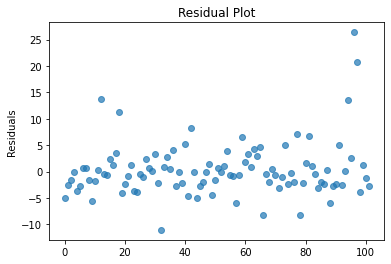

In [17]:
plt.scatter(range(len(y_test)) ,y_test - y_pred, alpha = 0.7)
plt.title("Residual Plot")
plt.ylabel("Residuals")
plt.show()

In [18]:
alphas = np.linspace(1, 500, 100)
coefs = []

for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

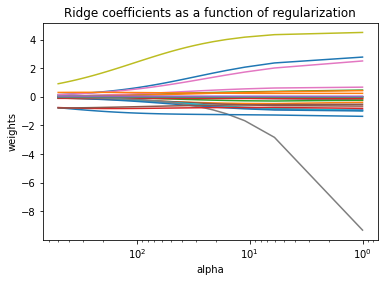

In [19]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of regularization")
plt.axis("tight")
plt.show()

From the plot we could see that no matter how we set the strength of regularization. We can't separate noise from features.

## Lasso Model

In [20]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)
y_train_pred = lasso_model.predict(X_train)
y_pred = lasso_model.predict(X_test)

In [21]:
print("Training mse:", mean_squared_error(y_train_pred, y_train))
print("Testing mse:", mean_squared_error(y_pred, y_test))
print("Training R2:", r2_score(y_train_pred, y_train))
print("Testing R2:", r2_score(y_pred, y_test))

Training mse: 26.416866673122932
Testing mse: 24.409489761299707
Training R2: 0.4948236210662962
Testing R2: 0.557902070885584


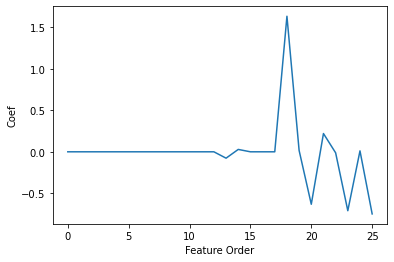

In [22]:
plt.plot(lasso_model.coef_)
plt.xlabel("Feature Order")
plt.ylabel("Coef")
plt.show()

In [23]:
print(lasso_model.intercept_)

34.93578037791188


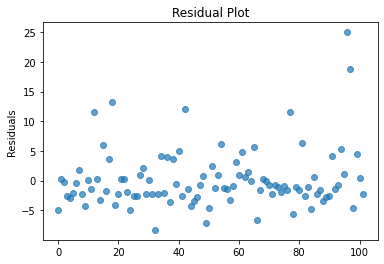

In [24]:
plt.scatter(range(len(y_test)) ,y_test - y_pred, alpha = 0.7)
plt.title("Residual Plot")
plt.ylabel("Residuals")
plt.show()

In [25]:
alphas = np.linspace(1, 500, 100)
coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=True)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

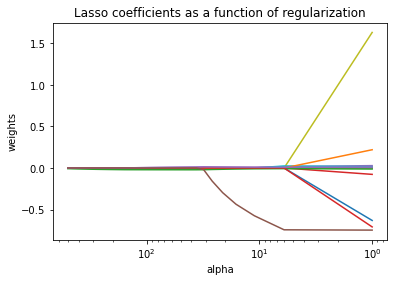

In [26]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of regularization")
plt.axis("tight")
plt.show()

From plot we can see that alpha=0 is a good choice to separate features with random noises. Ironically, after dropping off noise features, model generates worse mse on testing set.

### Manually Drop Noise Features

In [27]:
print(lasso_model.coef_ != 0)
print(lasso_model.coef_)

[False False False False False False False False False False False False
 False  True  True False False False  True  True  True  True  True  True
  True  True]
[ 0.         -0.          0.         -0.         -0.         -0.
  0.          0.         -0.         -0.         -0.          0.
 -0.         -0.07660927  0.02850064 -0.          0.         -0.
  1.63048892  0.01639478 -0.63085765  0.21965363 -0.01228558 -0.70858233
  0.0111811  -0.74710661]


In [28]:
# We manually drop the features that LASSO thinks are not good and fit linear regression again
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, lasso_model.coef_ != 0], y, test_size=0.2, random_state=42)

In [29]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_train_pred = linear_reg.predict(X_train)
y_pred = linear_reg.predict(X_test)

print("Training mse:", mean_squared_error(y_train_pred, y_train))
print("Testing mse:", mean_squared_error(y_pred, y_test))
print("Training R2:", r2_score(y_train_pred, y_train))
print("Testing R2:", r2_score(y_pred, y_test))

Training mse: 22.931208085828498
Testing mse: 25.912453733110368
Training R2: 0.6413759674986113
Testing R2: 0.6210952234166438


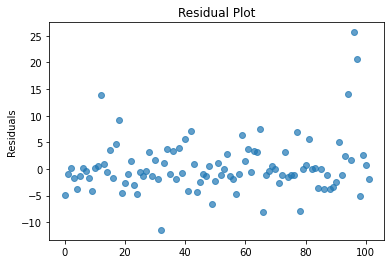

In [30]:
plt.scatter(range(len(y_test)) ,y_test - y_pred, alpha = 0.7)
plt.title("Residual Plot")
plt.ylabel("Residuals")
plt.show()

The result is better after we fit LASSO and manually drop the noise features.

In [31]:
print("My name is Zhicheng Tang")
print("My NetID is: zt17")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Zhicheng Tang
My NetID is: zt17
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
